In [11]:
suppressMessages(library(ArchR))
ss <- function(x, pattern, slot = 1, ...) { sapply(strsplit(x = x, split = pattern, ...), '[', slot) }
options(stringsAsFactors = F)
options(repr.plot.width=11, repr.plot.height=8.5)

In [12]:
##################################
### set Arrow File parameters ####
addArchRThreads(threads = 10)
addArchRGenome("mm10")

Setting default number of Parallel threads to 10.

Setting default genome to Mm10.



In [13]:
PROJDIR='../../../data/raw_data/mm10/BICCN_mouse_caudoputamen'
ARCHDIR=file.path(PROJDIR,'ArchR_BICCN_CP1_Neuron')
proj = loadArchRProject(ARCHDIR)

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

# Make plots

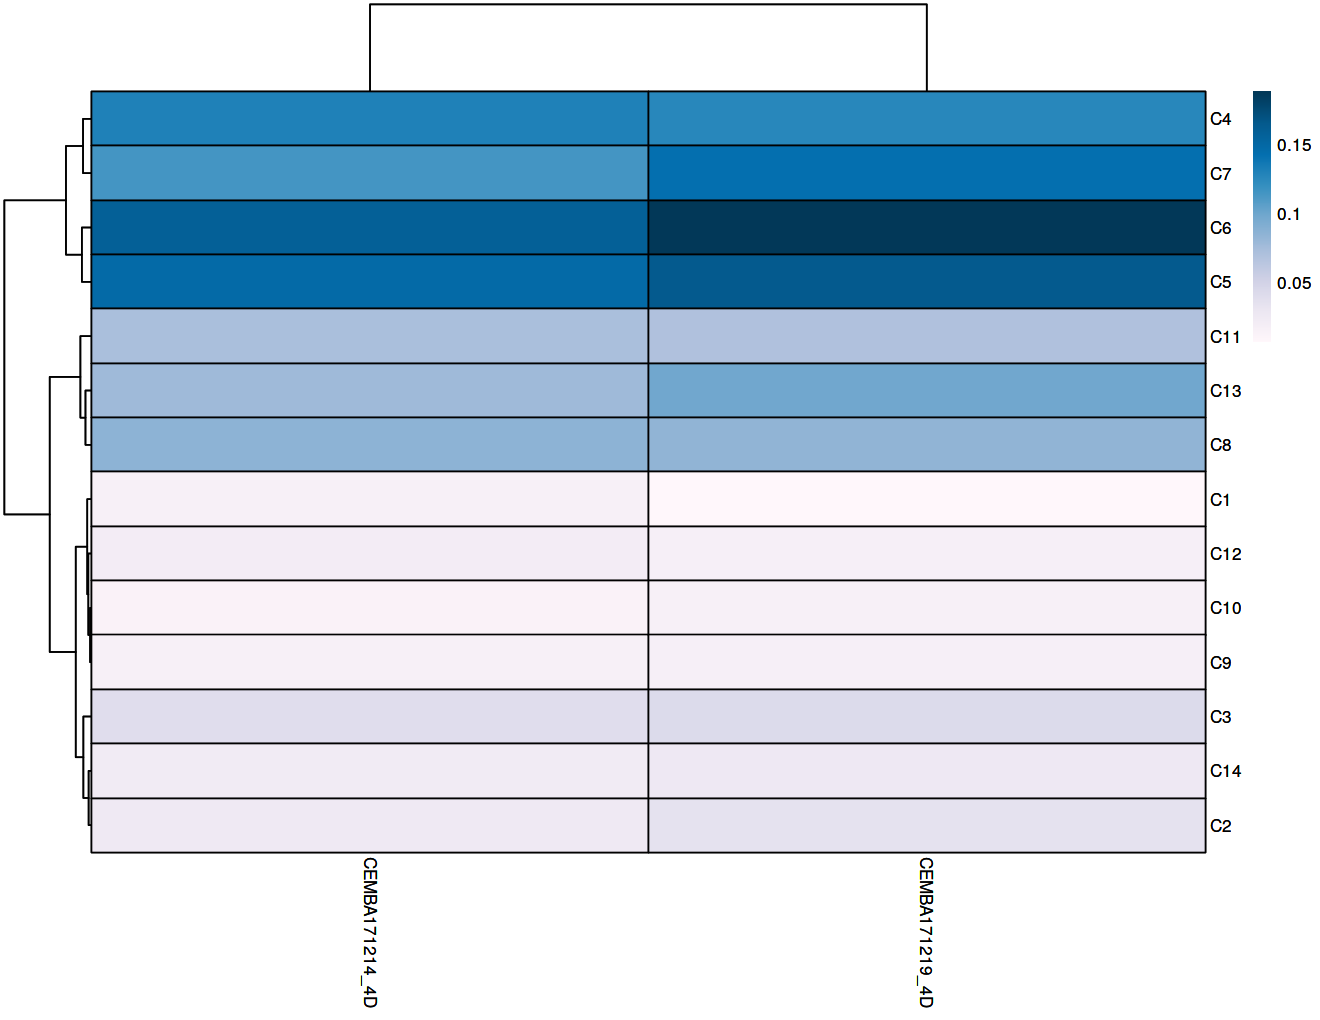

In [15]:
# plot the confusion matrix of cell types by subjects
cM <- confusionMatrix(paste0(proj$Clusters70), paste0(proj$Sample))
cM <- cM / Matrix::colSums(cM)
p <- pheatmap::pheatmap(
  mat = as.matrix(cM), 
  color = paletteContinuous("whiteBlue"), 
  border_color = "black")
p

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2ba02b57782f-Date-2021-01-30_Time-23-23-37.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2ba02b57782f-Date-2021-01-30_Time-23-23-37.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2ba05085e908-Date-2021-01-30_Time-23-23-42.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2ba05085e908-Date-2021-01-30_Time-23-23-42.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2ba03bfc3c1-Date-2021-01-30_Time-23-23-45.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2ba03bfc3c1-Date-2021-01-30_Time-23-23

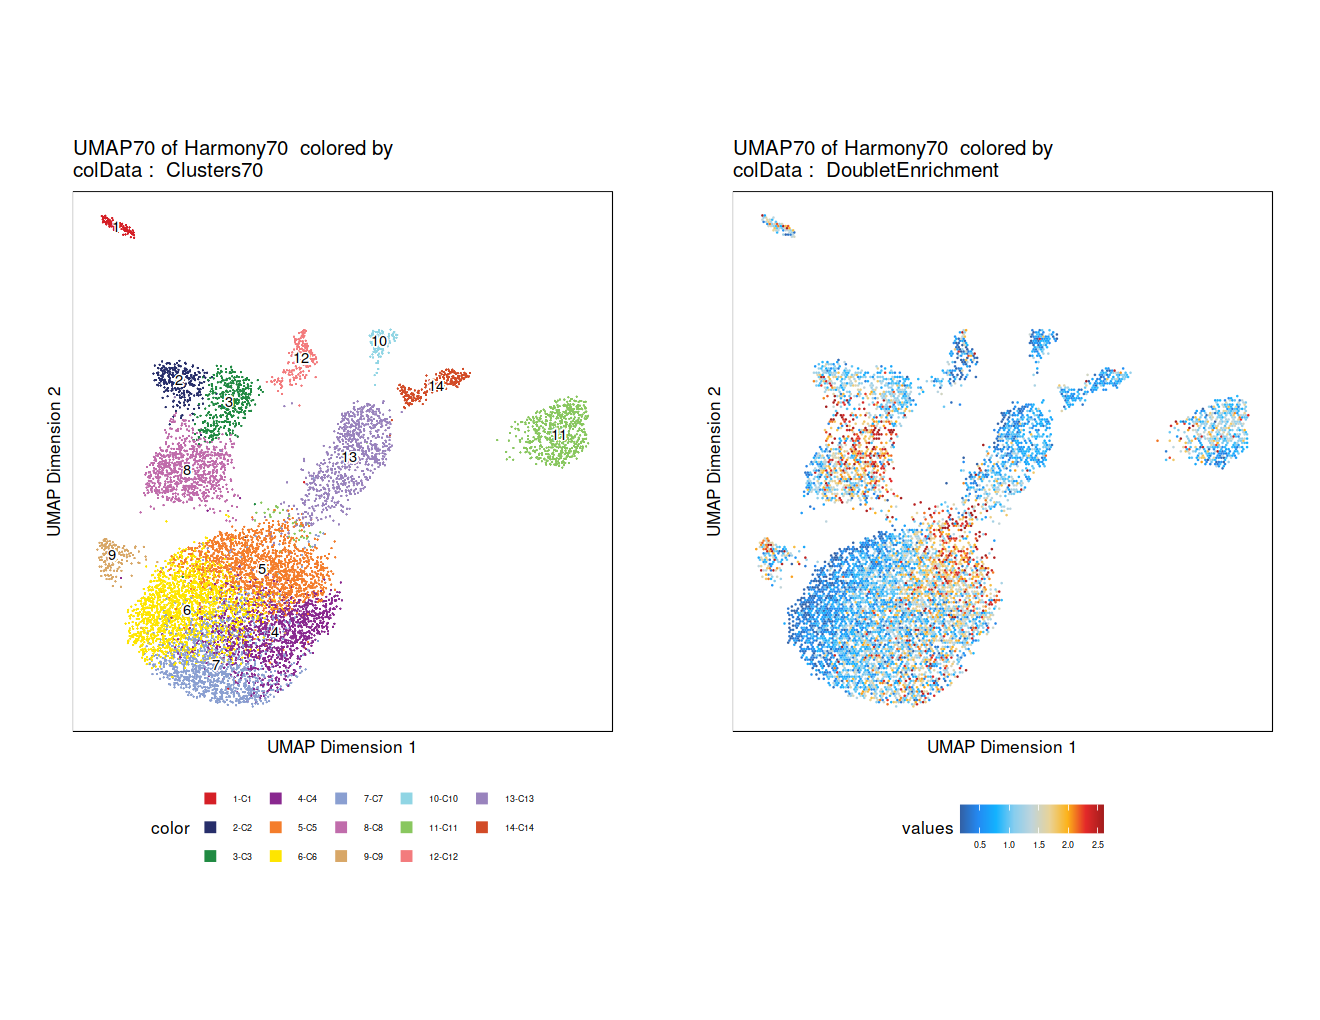

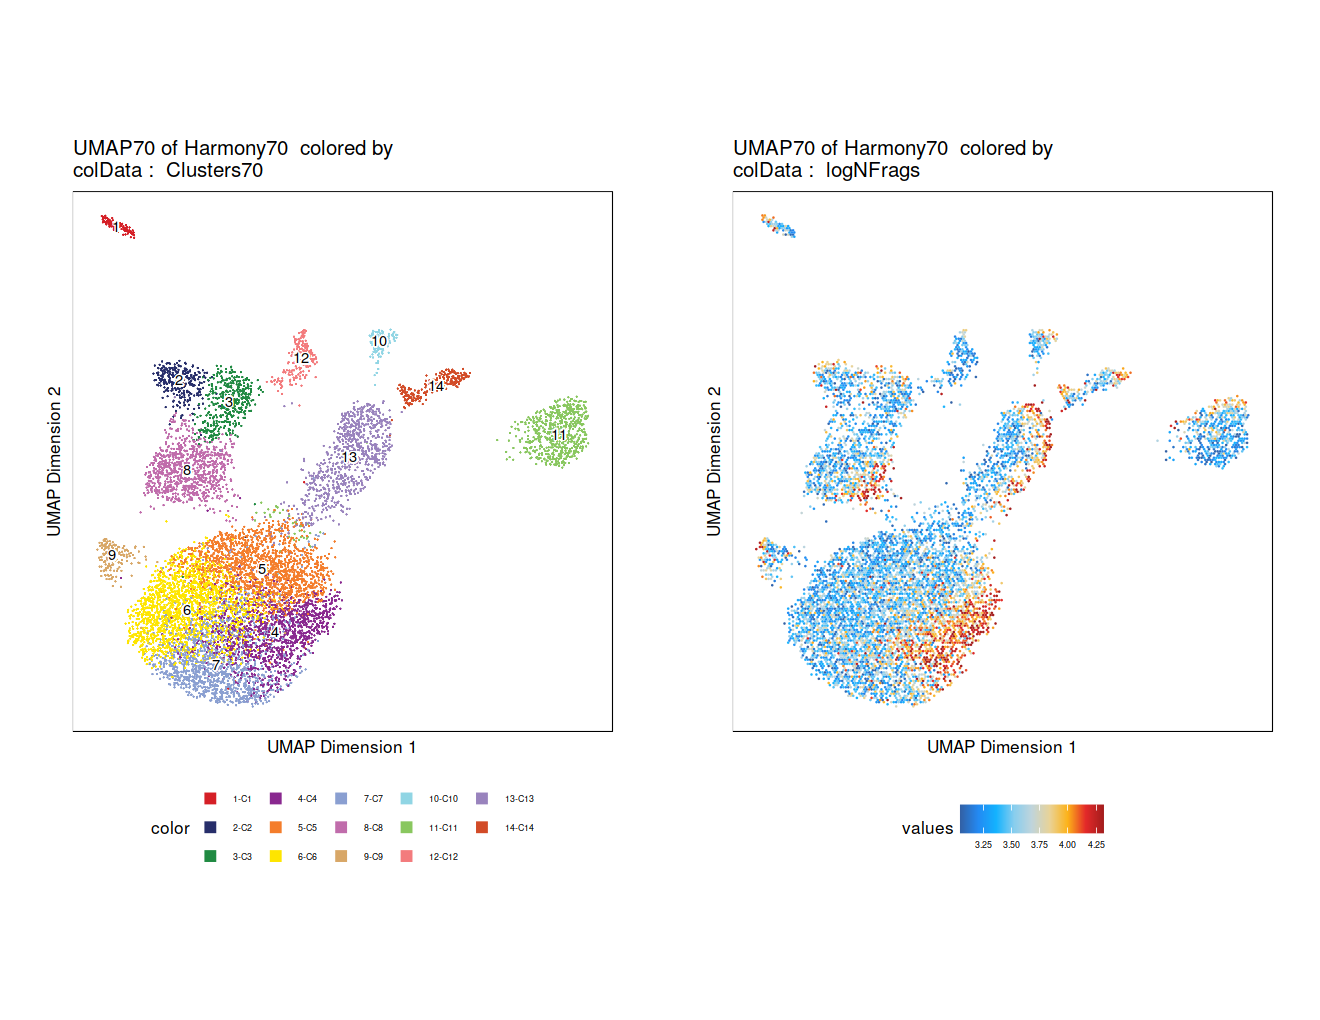

In [16]:
## make UMAP plots of
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "Clusters70", embedding = "UMAP70")

p2 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "DoubletEnrichment", embedding = "UMAP70")

ggAlignPlots(p1, p2, type = "h")
proj$logNFrags = log10(proj$nFrags)

p3 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "logNFrags", embedding = "UMAP70")

ggAlignPlots(p1, p3, type = "h")

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2ba06ffee7ec-Date-2021-01-30_Time-23-24-10.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-01-30 23:24:11 : 



Plotting Embedding

1 
2 
3 
4 
5 
6 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2ba06ffee7ec-Date-2021-01-30_Time-23-24-10.log



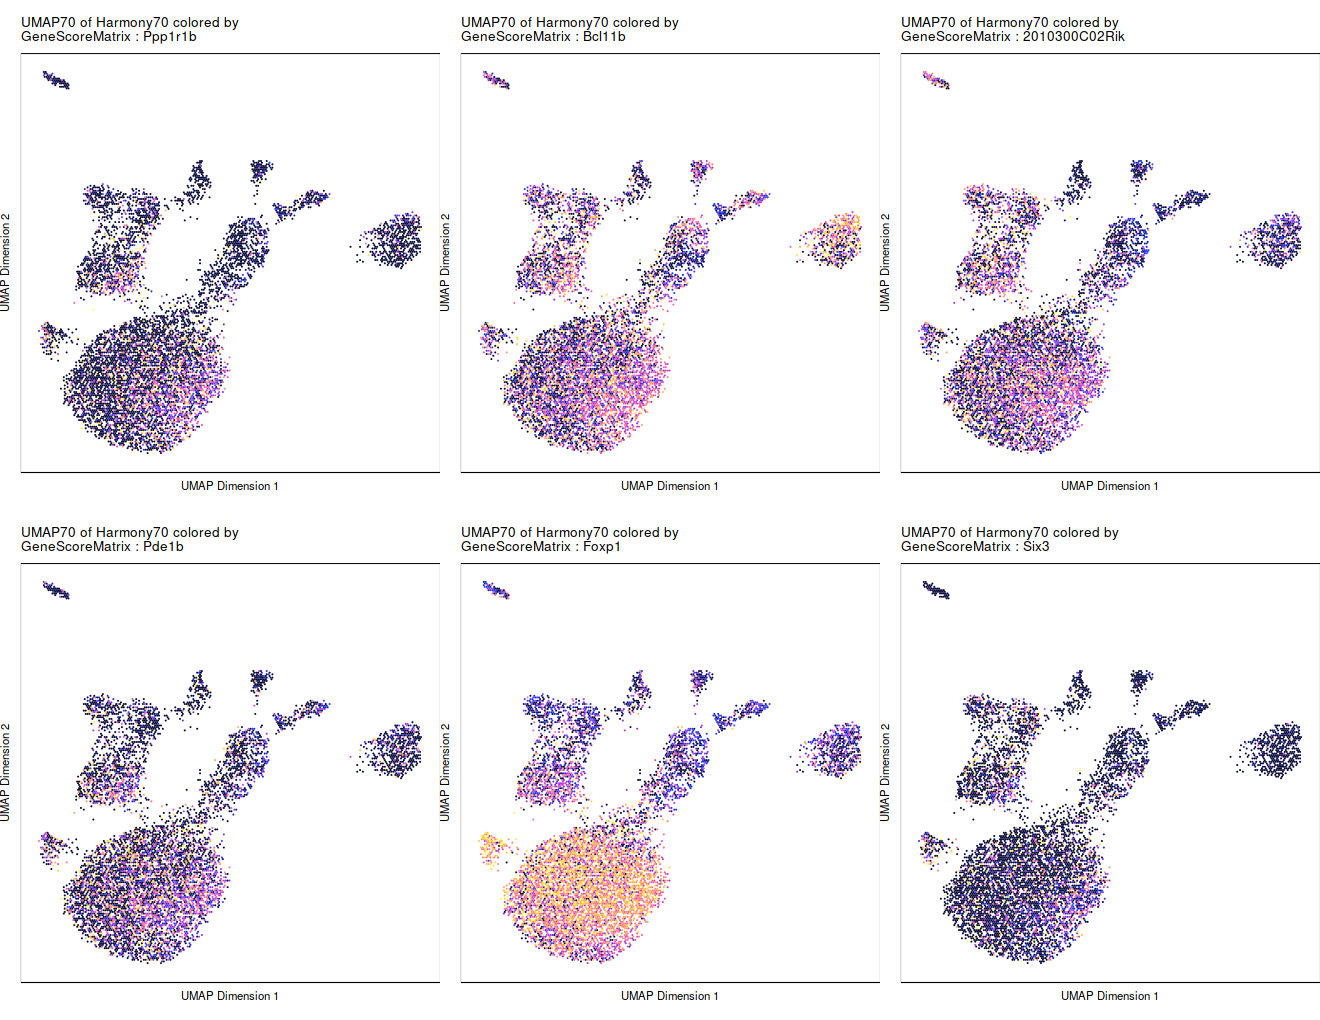

In [17]:
# Broad MSN marker, mouse 2010300C02Rik == human KIAA1211L
# MSN markers, Ppp1r1b = DARPP-32, Bcl11b=Ctip2
markMSN3 = c('Ppp1r1b','Bcl11b','2010300C02Rik','Pde1b','Foxp1','Six3' )
p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markMSN3, embedding = "UMAP70", imputeWeights = NULL)
p3 <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p3))

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2ba02db0953f-Date-2021-01-30_Time-23-24-38.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-01-30 23:24:38 : 



Plotting Embedding

1 
2 
3 
4 
5 
6 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2ba02db0953f-Date-2021-01-30_Time-23-24-38.log



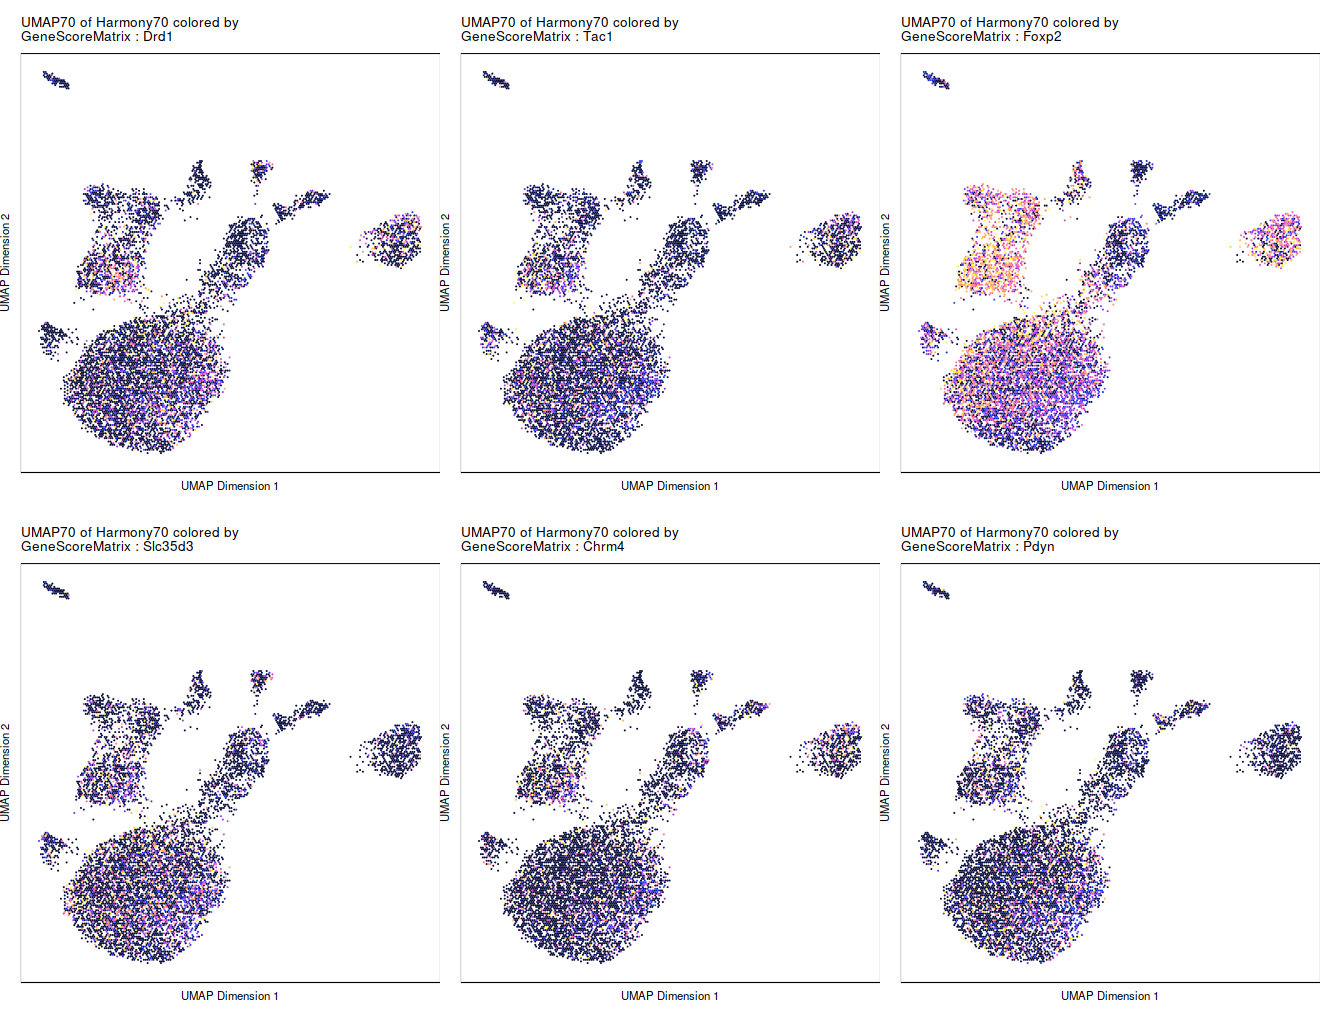

In [19]:
markMSN1 = c('Drd1','Tac1','Foxp2','Slc35d3','Chrm4', 'Pdyn') # D1 markers

# D1 MSN
p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markMSN1, embedding = "UMAP70", imputeWeights = NULL)
p1 <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme( axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
           axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p1))

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2ba044267b6a-Date-2021-01-30_Time-23-25-00.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-01-30 23:25:00 : 



Plotting Embedding

1 
2 
3 
4 
5 
6 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2ba044267b6a-Date-2021-01-30_Time-23-25-00.log



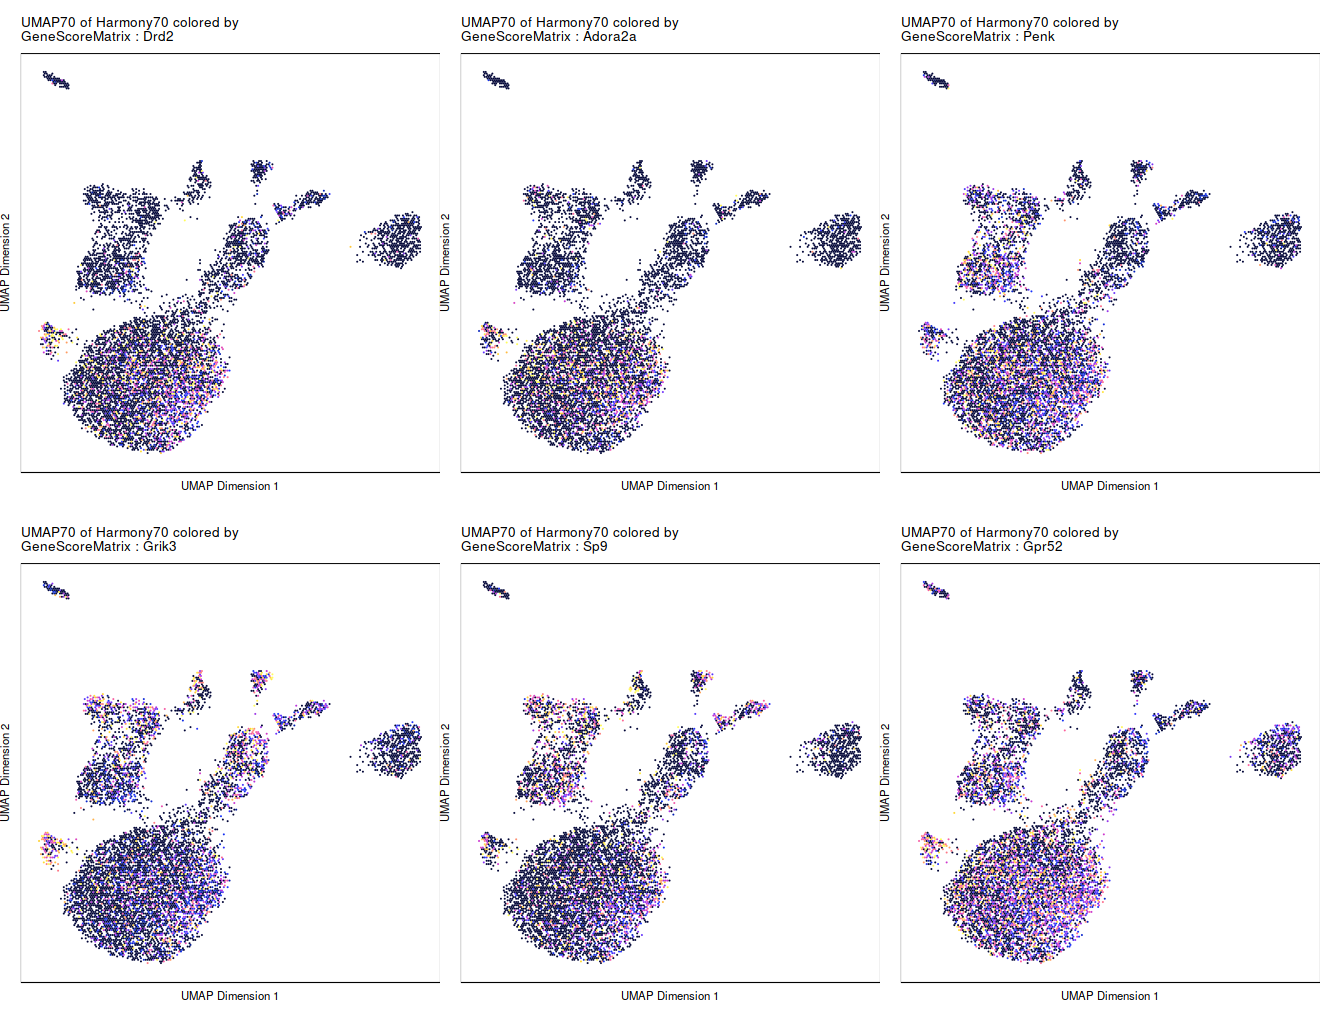

In [20]:
markMSN2 = c('Drd2','Adora2a','Penk', 'Grik3', 'Sp9', 'Gpr52')# D2 markers

# D2 MSN
p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markMSN2, embedding = "UMAP70", imputeWeights = NULL)
p2 <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))


ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2ba03b44cf8a-Date-2021-01-30_Time-23-25-25.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-01-30 23:25:25 : 



Plotting Embedding

1 
2 
3 
4 
5 
6 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2ba03b44cf8a-Date-2021-01-30_Time-23-25-25.log



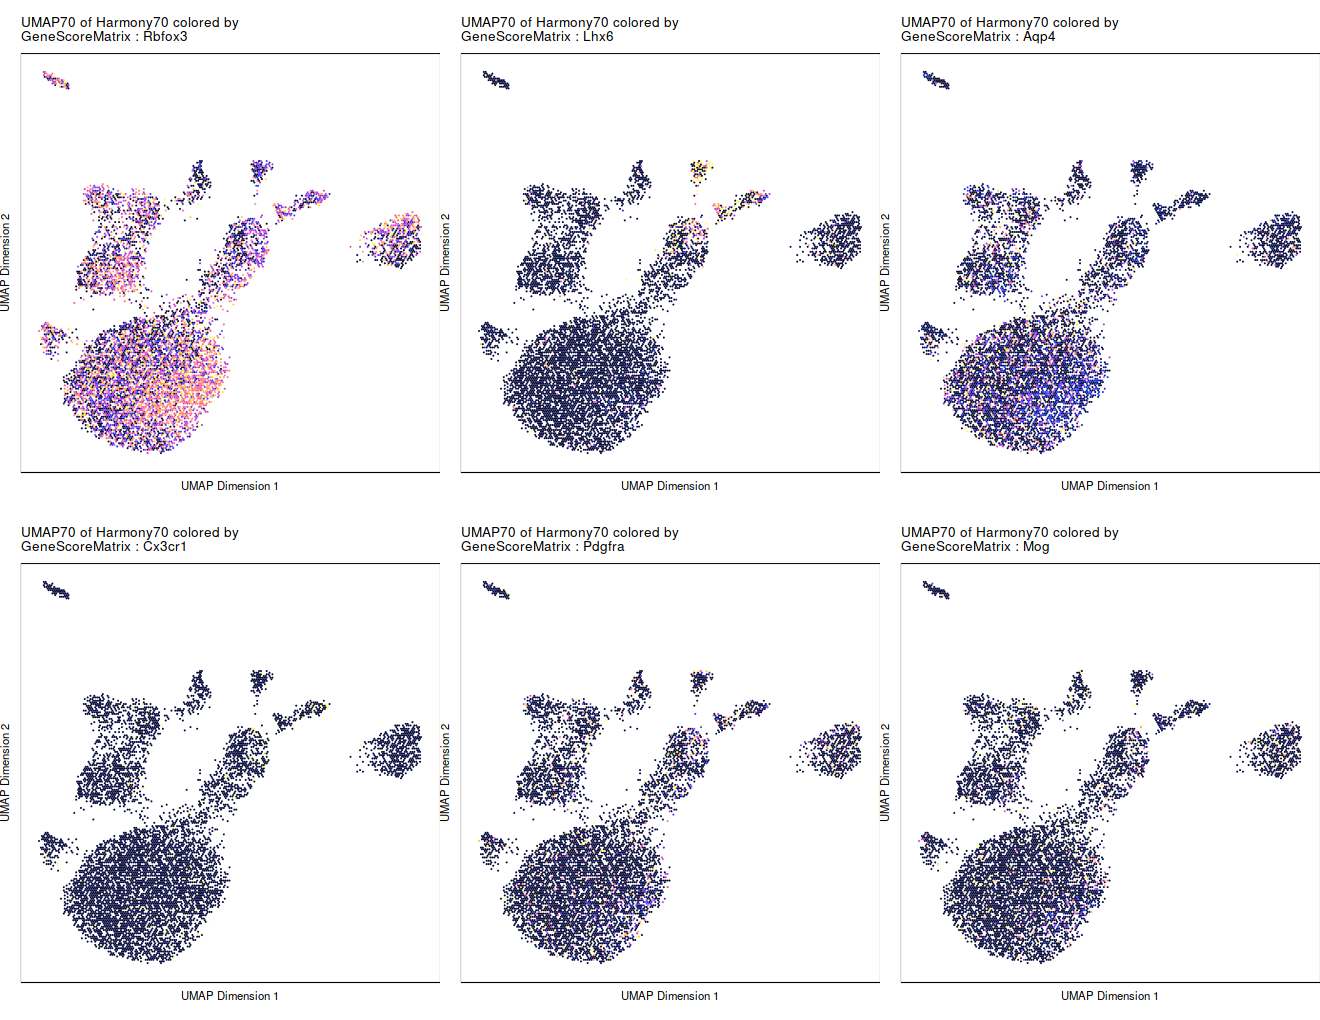

In [21]:
## Neuron vs. Glia markers
markerGenes1  <- c('Rbfox3', # Neuron
                   'Lhx6', #Interneuron
                   'Aqp4', # Astrocyte
                   'Cx3cr1', # Microglia
                   'Pdgfra', #OPC
                   'Mog' # Oligo
                  )

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markerGenes1, embedding = "UMAP70", imputeWeights = NULL)
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p))

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2ba03439eee5-Date-2021-01-30_Time-23-25-57.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-01-30 23:25:57 : 



Plotting Embedding

1 
2 
3 
4 
5 
6 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2ba03439eee5-Date-2021-01-30_Time-23-25-57.log



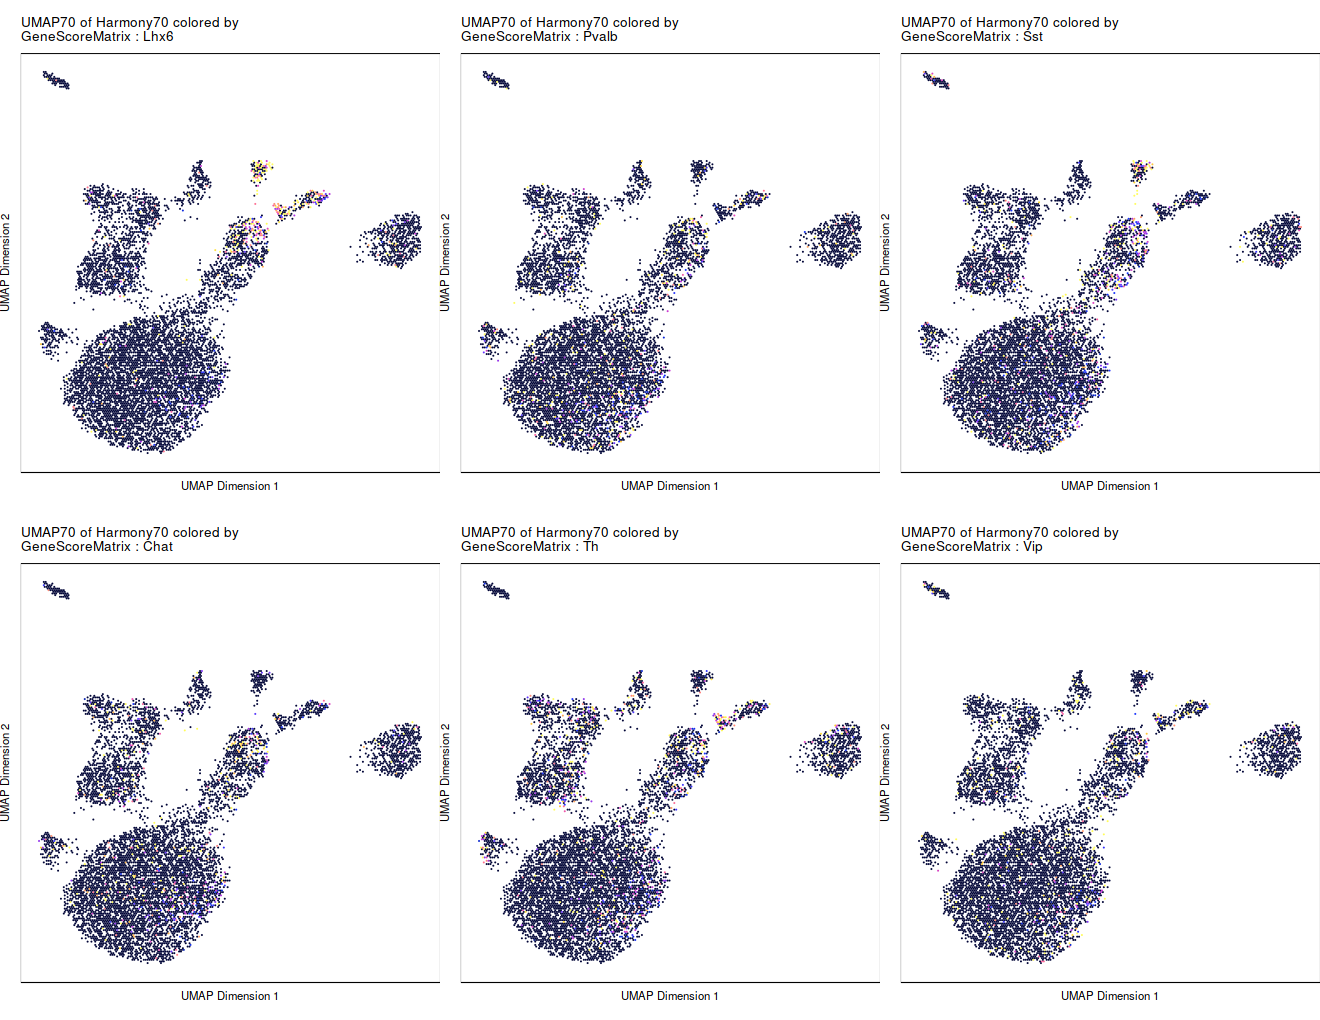

In [23]:
## plot more interneuron markers
markerGenes1  <- c('Lhx6', "Pvalb", 'Sst', 'Chat','Th', 'Vip') # Interneuron markers

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix",
                    name = markerGenes1, embedding = "UMAP70", imputeWeights = NULL)
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p))

# Relabel cluster and call peaks

In [ ]:
# plot the confusion matrix of cell types by subjects
cM <- confusionMatrix(paste0(proj$L2cluster), paste0(proj$Clusters70))
cM <- cM / Matrix::rowSums(cM)
p <- pheatmap::pheatmap(
  mat = as.matrix(cM), 
  color = paletteContinuous("whiteBlue"), 
  border_color = "black")
p

In [ ]:
############################################
# using marker gene scores, give cluster names
remapClust <- c(
    'C1' ='Oligo',
    'C2' ='OPC',
    'C3' ='Astro',
    'C4' ='Astro',
    'C5' ='Microglia',
    'C6' ='VLMC',
    'C7' ='Neuron', 
    'C8' ='Neuron',
    'C9' ='Neuron',
    'C10'='Neuron',
    'C11'='Neuron',
    'C12'='Neuron',
    'C13'='Neuron',
    'C14'='Neuron',
    'C15'='Neuron',
    'C16'='Neuron',
    'C17'='Neuron',
    'C18'='Neuron',
    'C19'='Neuron'
)
proj$Clusters2 <- mapLabels(proj$Clusters70, newLabels = remapClust, 
                            oldLabels = names(remapClust))
table(proj$Clusters2)

In [ ]:
## make UMAP70 plots
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "Clusters2", embedding = "UMAP70")
p1